## K-means con scikit-learn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('insurance_cluster.csv')
#df2 = pd.get_dummies(df)
#df2.head()
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


<Axes: xlabel='expenses', ylabel='Count'>

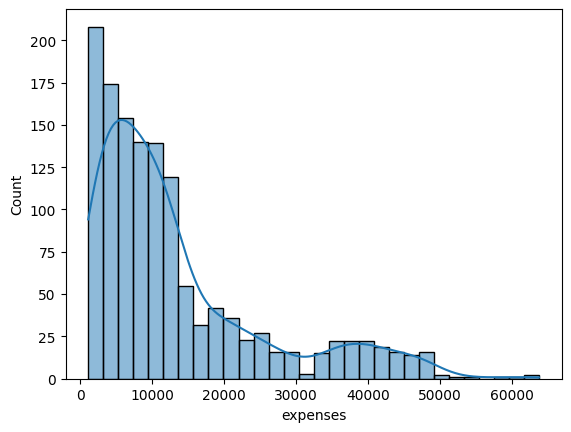

In [3]:
sns.histplot(df.expenses, kde=True)

<Axes: xlabel='expenses', ylabel='Count'>

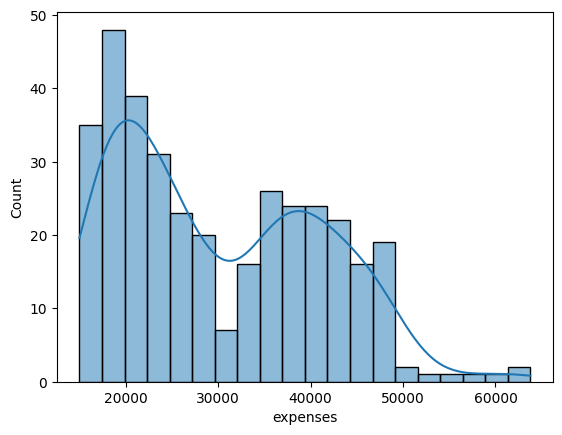

In [4]:
# Elimino aquellas polizas con menor gasto para enfocar mi estudio a los asegurados de mayor gasto
df.drop(df[df.expenses<15000].index, inplace=True)
sns.histplot(df.expenses, bins=20, kde=True)

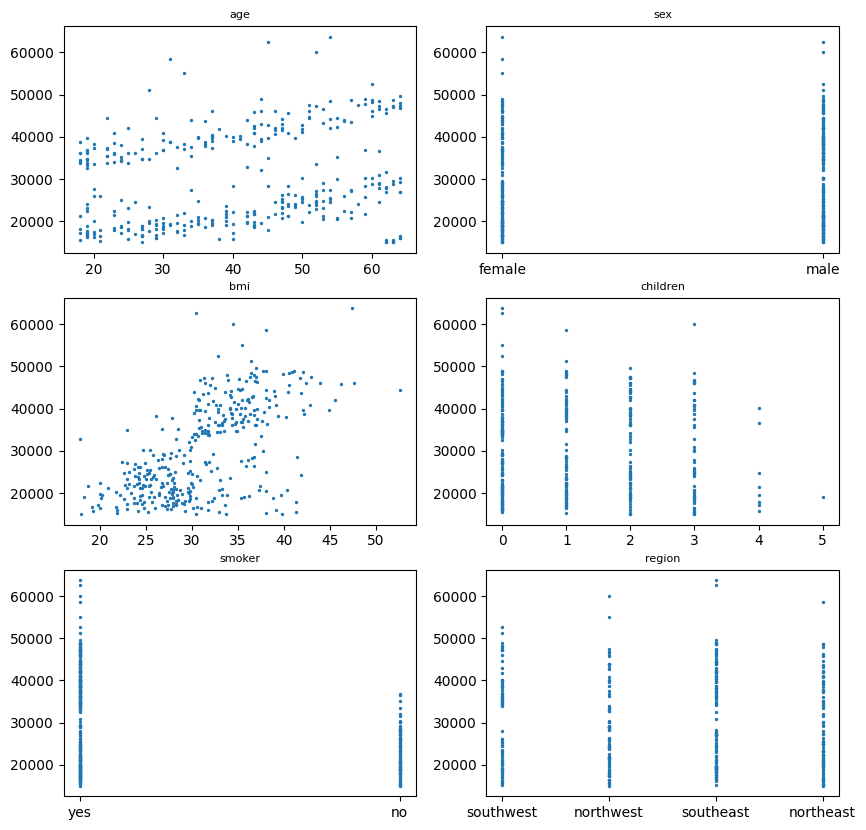

In [5]:
plt.figure(figsize=(10,10))
for index, columns in enumerate(df.columns[:6]):
    plt.subplot(321+index)
    plt.scatter(df[columns], df.expenses, s=2) 
    plt.title(columns, fontsize=8)
plt.show()

## Realizo un n cluster basado en edad y bmi

In [6]:
data = df[['bmi', 'expenses']]
data.head()

,bmi,expenses
0,27.9,16884.92
3,22.7,21984.47
9,25.8,28923.14
11,26.3,27808.73
14,42.1,39611.76


In [7]:
n = 2 # número de grupos
k_means = KMeans(n_init=1, n_clusters=n)
modelo = k_means.fit(data)
centroides = modelo.cluster_centers_
etiquetas = modelo.labels_

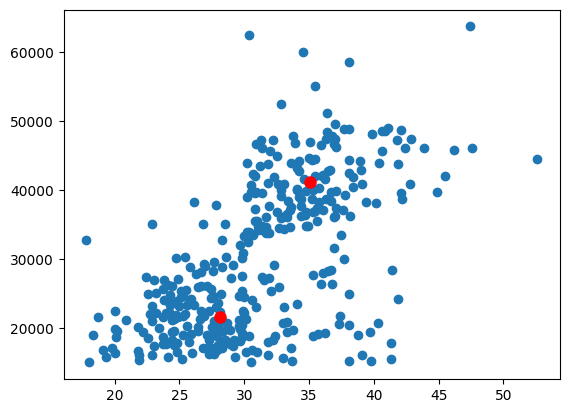

In [8]:
plt.scatter(data.bmi,data.expenses)
plt.plot(centroides[:,0],centroides[:,1],'ro',markersize=8)
plt.show()

## Estudio de cluster óptimo: Curva de Elbow

In [9]:
for i in range(1,8):
    k_means = KMeans(n_init=1, n_clusters=i)
    b = k_means.fit(data)
    print(i, b.score(data))

1 -42510357770.592705
2 -8844152628.909813
3 -5123151643.515081
4 -2869891502.8386297
5 -2099861885.2038665
6 -1444971779.4619555
7 -1426828293.43268


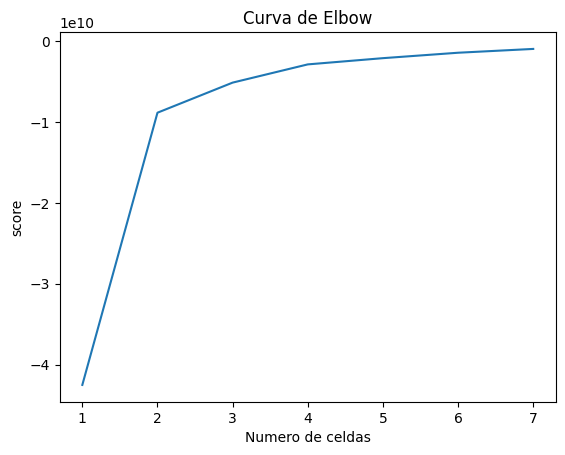

In [10]:
Nc = range(1, 8)
kmeans = [KMeans(n_init=1, n_clusters=i) for i in Nc]
score = [kmeans[i].fit(data).score(data) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Numero de celdas')
plt.ylabel('score')
plt.title('Curva de Elbow')
plt.show()